<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте и изучите файл</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбейте данные на выборки</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуйте модели</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

# План
1. Открыть и изучить датасет,
2. Разделить исходные данные на обучающую, валидационную и тестовую выборки,
3. Исследовать качество разных моделей, меняя гиперпараметры,
4. Проверить качество модели на тестовой выборке,
5. Проверить модели на вменяемость.

## Откройте и изучите файл

In [34]:
from tqdm.notebook import tqdm_notebook

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [35]:
local_path = r'users_behavior.csv'
ya_path = r'/datasets/users_behavior.csv'

try:
    df_raw = pd.read_csv(local_path)
except:
    df_raw = pd.read_csv(ya_path)

In [36]:
df_raw.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [37]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Заменим тип данных в столбце 'calls' и 'messages' с `float` на `int`(количество и сообщений звонков не может быть дробным)

In [38]:
df_raw = df_raw.astype({'calls':'int', 'messages':'int'})
df_raw.dtypes

calls         int32
minutes     float64
messages      int32
mb_used     float64
is_ultra      int64
dtype: object

Рассмортим корреляцию параметров нашего датасета.

In [39]:
df_raw.corr().round(2)

,calls,minutes,messages,mb_used,is_ultra
calls,1.00,0.98,0.18,0.29,0.21
minutes,0.98,1.00,0.17,0.28,0.21
messages,0.18,0.17,1.00,0.20,0.20
mb_used,0.29,0.28,0.20,1.00,0.20
is_ultra,0.21,0.21,0.20,0.20,1.00


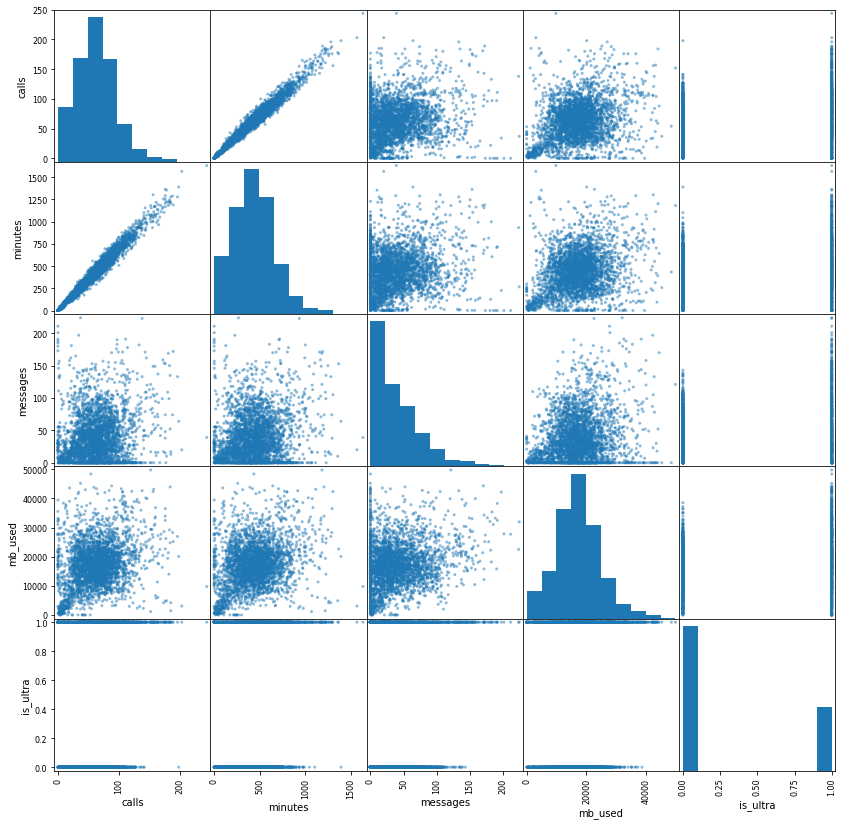

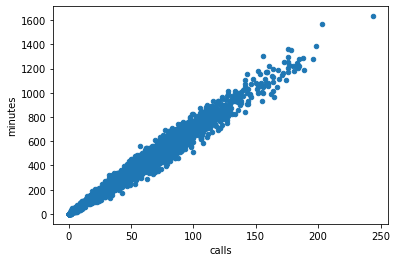

In [40]:
pd.plotting.scatter_matrix( df_raw, figsize=(14,14) );
df_raw.plot(kind='scatter', x='calls', y='minutes');

Сильная  линейная корреляция между количеством звонков и потраченных минут.   
Время разговора может быть любым, даже 0, а вот звонки клиент совершает всегда. Удалим столбец минуты.

In [41]:
df_raw = df_raw.drop('minutes', axis=1)
df_raw

,calls,messages,mb_used,is_ultra
0,40,83,19915.42,0
1,85,56,22696.96,0
2,77,86,21060.45,0
3,106,81,8437.39,1
4,66,1,14502.75,0
...,...,...,...,...
3209,122,20,35124.90,1
3210,25,0,3275.61,0
3211,97,70,13974.06,0
3212,64,90,31239.78,0


In [42]:
df_raw['is_ultra'].value_counts(normalize=True).round(2)

0    0.69
1    0.31
Name: is_ultra, dtype: float64

Перекос  в целевом признаке в сторону 0 - тариф 'smart'. Эта информация пригодится для определения стратегии классификации в DummyClassifier()

### Вывод
Датасет открыт, изучен.

## Разбейте данные на выборки

Создадим обучающую, тестовую и валидационную выборки на основе нашего датасета. На обучающую отведем 60% данных, а на остальные по 20%.

In [43]:
# тренировочная, тестовая выборки
df_train, df_test = train_test_split(
    df_raw,
    test_size=0.2,
    train_size=0.6,
    random_state=12345,
)

In [44]:
print(len(df_train))
print(len(df_test))

1928
643


создадим общий список индексов, полученных выборок

In [45]:
# список индексов
lst_q = df_train.index.to_list() + df_test.index.to_list()

# проверка 
print(len(lst_q) == len(df_train) + len(df_test))

True


In [46]:
# валидационная выборка из среза индексов, не попавших в две остальные выборки
df_valid = df_raw.query(" index not in @lst_q ")
print(len(df_valid))
df_valid.head()

643


,calls,messages,mb_used,is_ultra
13,56,16,16702.36,0
18,79,90,19908.31,0
23,11,19,2305.74,0
39,81,34,12750.82,0
43,50,10,20922.05,1


### Вывод
Соответсвующие выборки созданы.

## Исследуйте модели

Целевой признак (столбец is_ultra) - категориальный, следовательно, решается задача классификации.  
Разобъем данные на признаки и целевые признаки

In [47]:
# признаки
train_features = df_train.drop('is_ultra', axis=1)
test_features = df_test.drop('is_ultra', axis=1)
valid_features = df_valid.drop('is_ultra', axis=1)

# целевой признак
train_target = df_train['is_ultra']
test_target = df_test['is_ultra']
valid_target = df_valid['is_ultra']

### Решающее дерево

In [48]:
best_tree_model = 0
best_tree_result = 0
best_tree_depth = 0


for depth in tqdm_notebook(range(1, 100)):
    model  = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    
#     valid_predict = model.predict(valid_features)
#     result = accuracy_score(valid_target, valid_predict)
    
    result = model.score(valid_features, valid_target)
    if result > best_tree_result:
        best_tree_model = model
        best_tree_result = result
        best_tree_depth = depth

print('Accuracy модели =', best_tree_result, '\nглубина дерева =', best_tree_depth)        

  0%|          | 0/99 [00:00<?, ?it/s]

Accuracy модели = 0.8102643856920684 
глубина дерева = 9


### Случайный лес

In [49]:
best_forest_model = 0
best_forest_result = 0
best_forest_depth = 0
best_forest_est = 0
best_split = 0
best_leaf = 0

for est in tqdm_notebook(range(37, 41, 1)):
    
    for depth in tqdm_notebook(range(21, 24, 1), leave=False):
        
        for split in tqdm_notebook(range(2,4), leave=False):
            
            for leaf in (range(3,6, 1)):
                
                model = RandomForestClassifier(
                    random_state=12345,
                    max_depth=depth,
                    n_estimators=est,
                    n_jobs=-1,
                    min_samples_split=split,
                    min_samples_leaf=leaf
        )
        
                model.fit(train_features, train_target)
                result = model.score(valid_features, valid_target)
        
                if result > best_forest_result:
                    best_forest_model = model
                    best_forest_result = result
                    best_forest_depth = depth
                    best_forest_est = est
                    best_split = split
                    best_leaf = leaf
        
print('Accuracy модели =', best_forest_result,
      '\nКол-во деревьев =', best_forest_est,
      '\nглубина дерева =', best_forest_depth,
      '\nmin_samples_split =', best_split,
      '\nmin_samples_leaf =', best_leaf,
     )

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Accuracy модели = 0.8367029548989113 
Кол-во деревьев = 38 
глубина дерева = 22 
min_samples_split = 2 
min_samples_leaf = 4


### Логистическая регрессия

In [50]:
model_logistic = LogisticRegression(random_state=12345)
model_logistic.fit(train_features, train_target)
result_logistic = model_logistic.score(valid_features, valid_target)
print(result_logistic)

0.7387247278382582


### Вывод
Лучшей моделью является модель случайного леса

## Проверьте модель на тестовой выборке

In [51]:
best_forest_model.score(test_features, test_target)

0.7791601866251944

### Вывод
Модель сдучайного леса успешно протестирована c accuracy=0.78

## (бонус) Проверьте модели на адекватность

Для проверки модели на адекватность будем использовать классификатор [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).  

Для проверки модели применим [стратегию](https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/) (п.3.3.6) — `most_frequent` (всегда предсказывает наиболее частую метку в обучающем наборе).  

Если результат будет лучше чем результат модели случайного леса, то модель необходимо переобучить с новыми параметрами.

In [52]:
clf = DummyClassifier(strategy='most_frequent', random_state=12345)
clf.fit(train_features, train_target)  
print('most_frequent =', clf.score(test_features, test_target))

# на всякий случай проверить
clf = DummyClassifier(strategy='stratified', random_state=12345)
clf.fit(train_features, train_target)  
print('stratified =', clf.score(test_features, test_target))

most_frequent = 0.6951788491446346
stratified = 0.578538102643857


accuracy=0,78 случайного леса выше accuracy полученной с помощью DummyClassifier.

### Вывод
Модель случайный лес проверена на адекватность. 